# Models
- **（1）scale_pos_weight=1；新的未处理的特征数据（std==0未处理）[完成]**   
    - **模型参数1**  - f1_score：0.567442  
XGBClassifier(learning_rate =0.1, n_estimators=60, max_depth=7, min_child_weight=1,gamma=0,subsample=0.9, colsample_bytree=0.9, reg_alpha=0, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)  
threhold = 0.16  

    - **模型参数2**  
    xgb1a = XGBClassifier(learning_rate =0.01, n_estimators=725, max_depth=7, min_child_weight=1,gamma=0,subsample=0.9, colsample_bytree=0.9, reg_alpha=0, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)  
threhold = 0.15  

- **（2）scale_pos_weight=1；特征数据清洗（std==0删除）[完成]** 
    - **模型参数1**  - f1_score：0.583756  
    XGBClassifier(learning_rate =0.1, n_estimators=97, max_depth=8, min_child_weight=2, gamma=0.1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)  
threhold = 0.17  

    - **模型参数2**   -f1_score：0.584270；  调节threshold能达到0.5892  
    xgb2a = XGBClassifier(learning_rate =0.01, n_estimators=872, max_depth=8, min_child_weight=2, gamma=0.1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)  
threhold = 0.16   

    xgb2b = XGBClassifier(learning_rate =0.005, n_estimators=1550, max_depth=8, min_child_weight=2, gamma=0.1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27) 
threhold=0.21，f1_score=0.61  

    - **（3）scale_pos_weight=1；特征数据清洗（std==0删除）+额外构造的fee特征**   f1_score=0.605  
    xgb3 = XGBClassifier( learning_rate =0.1, n_estimators=64, max_depth=6, min_child_weight=2, gamma=0,subsample=0.8, colsample_bytree=0.9, reg_alpha=0.01, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)  
threhold = 0.28  

    xgb3a = XGBClassifier( learning_rate =0.01, n_estimators=832, max_depth=6, min_child_weight=2, gamma=0,subsample=0.8, colsample_bytree=0.9, reg_alpha=0.01, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)  
threhold = 0.28 

    xgb3b = XGBClassifier( learning_rate =0.005, n_estimators=1574, max_depth=6, min_child_weight=2, gamma=0,subsample=0.8, colsample_bytree=0.9, reg_alpha=0.01, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)  
threshold = 0.198  f1-score:0.604651  

    - **（4）scale_pos_weight=1；特征数据清洗（std==0删除）+额外构造的fee特征-最不重要的特征（出现一二次）**  
    xgb4 = XGBClassifier( learning_rate =0.1, n_estimators=90, max_depth=8, min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8, reg_alpha=0, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)    
    xgb4a = XGBClassifier( learning_rate =0.01, n_estimators=667, max_depth=8, min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8, reg_alpha=0, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)    
    xgb4b = XGBClassifier( learning_rate =0.005, n_estimators=1535, max_depth=8, min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8, reg_alpha=0, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)  

    - **（5）scale_pos_weight=1；特征数据清洗（std==0删除）+额外构造的fee特征-最不重要的特征（出现一二次+平均出现不足5次）** 

    **第二大类**  
    - **（6）scale_pos_weight=1；特征数据清洗（std==0删除）+额外构造的fee特征 + 稀疏特征 [完成]**  
    xgb_5a = XGBClassifier( learning_rate =0.01, n_estimators=719, max_depth=8, min_child_weight=4, gamma=0.1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)  
    
    - **（7）scale_pos_weight=1；特征数据清洗（std==0删除）-额外构造的fee特征 + 稀疏特征 [明天]**   
    xx?  
    
    
    **可能最佳模型**  
    所有特征数据+清洗，即模型（7）

In [1]:
# Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4

# 为显示中文
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei']

D:\Program Files\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Program Files\Anaconda\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Models - 1

In [2]:
df_train_test = pd.read_csv('df_data_train.csv',index_col='个人编码').fillna(0)

In [3]:
predictors = df_train_test.columns.difference(['target','first_time'])
target = 'target'

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
ss = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=0)
idx_train, idx_test = ss.split(df_train_test[predictors],df_train_test[target]).next()
print 'train: ',len(idx_train)
print 'test: ',len(idx_test)
print 'ratio',float(len(idx_test))/(len(idx_train)+len(idx_test))

train:  16000
test:  4000
ratio 0.2


In [5]:
df_train = df_train_test.iloc[idx_train,:]
df_test = df_train_test.iloc[idx_test,:]

In [6]:
xgb_1a = XGBClassifier(learning_rate =0.01, n_estimators=725, max_depth=7, min_child_weight=1,\
                      gamma=0,subsample=0.9, colsample_bytree=0.9, reg_alpha=0,\
                      objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb_1a.fit(df_train[predictors],df_train[target])

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=725, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.9)

In [7]:
# predict on testing data:
df_test_predictions_la = xgb_1a.predict(df_test[predictors])
df_test_predprob_1a = xgb_1a.predict_proba(df_test[predictors])[:,1]
feat_imp_1a = pd.Series(xgb_1a.booster().get_fscore()).sort_values(ascending=False)

# Models - 2

In [8]:
predictors = df_train_test.columns.difference(['target'])
predictors_std = df_train_test[predictors].std()
# std 为0的特征（去除）
zero_std_predictors = predictors_std[predictors_std == 0].index
df_train_test = df_train_test.drop(zero_std_predictors,axis=1)
predictors = df_train_test.columns.difference(['target','first_time'])
target = 'target'

In [9]:
df_train = df_train_test.iloc[idx_train,:]
df_test = df_train_test.iloc[idx_test,:]

In [10]:
xgb_2a = XGBClassifier(learning_rate =0.01, n_estimators=872, max_depth=8, min_child_weight=2,\
                      gamma=0.1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0,\
                      objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb_2a.fit(df_train[predictors],df_train[target])
# predict on testing data:
df_test_predictions_2a = xgb_2a.predict(df_test[predictors])
df_test_predprob_2a = xgb_2a.predict_proba(df_test[predictors])[:,1]
feat_imp_2a = pd.Series(xgb_2a.booster().get_fscore()).sort_values(ascending=False)

In [11]:
xgb_2b = XGBClassifier(learning_rate =0.005, n_estimators=1550, max_depth=8, min_child_weight=2,\
                      gamma=0.1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0,\
                      objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb_2b.fit(df_train[predictors],df_train[target])
# predict on testing data:
df_test_predictions_2b = xgb_2b.predict(df_test[predictors])
df_test_predprob_2b = xgb_2b.predict_proba(df_test[predictors])[:,1]
feat_imp_2b = pd.Series(xgb_2b.booster().get_fscore()).sort_values(ascending=False)

# Models - 3

In [12]:
df_train_test = pd.read_csv('df_data_train_clean.csv',index_col='个人编码').fillna(0)

In [13]:
predictors = df_train_test.columns.difference(['target','first_time'])
target = 'target'

In [14]:
# spliting was done in when modeling the fisrt xgb_1a
df_train = df_train_test.iloc[idx_train,:]
df_test = df_train_test.iloc[idx_test,:]

In [15]:
xgb_3 = XGBClassifier( learning_rate =0.1, n_estimators=64, max_depth=6, min_child_weight=2,\
                     gamma=0,subsample=0.8, colsample_bytree=0.9, reg_alpha=0.01,\
                     objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
xgb_3.fit(df_train[predictors],df_train[target])
# predict on testing data:
df_test_predictions_3 = xgb_3.predict(df_test[predictors])
df_test_predprob_3 = xgb_3.predict_proba(df_test[predictors])[:,1]
feat_imp_3 = pd.Series(xgb_3.booster().get_fscore()).sort_values(ascending=False)

In [16]:
xgb_3a = XGBClassifier( learning_rate =0.01, n_estimators=832, max_depth=6, min_child_weight=2,\
                       gamma=0,subsample=0.8, colsample_bytree=0.9, reg_alpha=0.01,\
                       objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
xgb_3a.fit(df_train[predictors],df_train[target])
# predict on testing data:
df_test_predictions_3a = xgb_3a.predict(df_test[predictors])
df_test_predprob_3a = xgb_3a.predict_proba(df_test[predictors])[:,1]
feat_imp_3a = pd.Series(xgb_3a.booster().get_fscore()).sort_values(ascending=False)

In [17]:
xgb_3b = XGBClassifier( learning_rate =0.005, n_estimators=1574, max_depth=6, min_child_weight=2,\
                       gamma=0,subsample=0.8, colsample_bytree=0.9, reg_alpha=0.01,\
                       objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
xgb_3b.fit(df_train[predictors],df_train[target])
# predict on testing data:
df_test_predictions_3b = xgb_3b.predict(df_test[predictors])
df_test_predprob_3b = xgb_3b.predict_proba(df_test[predictors])[:,1]
feat_imp_3b = pd.Series(xgb_3b.booster().get_fscore()).sort_values(ascending=False)

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rf.fit(df_train[predictors],df_train[target])
# predict on testing data:
df_test_predictions_rf = rf.predict(df_test[predictors])
df_test_predprob_rf = rf.predict_proba(df_test[predictors])[:,1]
feat_imp_rf = pd.Series(rf.feature_importances_,index=predictors).sort_values(ascending=False)

# Models - 4

In [19]:
feat_imp = pd.read_csv('feat_imp.csv',index_col=0)
feat_clean = feat_imp[(feat_imp.isnull().sum(axis=1).sort_values(ascending=False) >= 2)].index
predictors = df_train_test.columns.difference(['target','first_time']).difference(feat_clean)
target = 'target'

D:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [20]:
# spliting was done in when modeling the fisrt xgb_1a
df_train = df_train_test.iloc[idx_train,:]
df_test = df_train_test.iloc[idx_test,:]

In [22]:
xgb_4 = XGBClassifier( learning_rate =0.1, n_estimators=90, max_depth=8, min_child_weight=3, gamma=0,\
                     subsample=0.8, colsample_bytree=0.8, reg_alpha=0, objective= 'binary:logistic',\
                     nthread=4, scale_pos_weight=1, seed=27)
xgb_4.fit(df_train[predictors],df_train[target])
# predict on testing data:
df_test_predictions_4 = xgb_4.predict(df_test[predictors])
df_test_predprob_4 = xgb_4.predict_proba(df_test[predictors])[:,1]
feat_imp_4 = pd.Series(xgb_4.booster().get_fscore()).sort_values(ascending=False)

In [24]:
xgb_4a = XGBClassifier( learning_rate =0.01, n_estimators=667, max_depth=8, min_child_weight=3, gamma=0,\
                      subsample=0.8, colsample_bytree=0.8, reg_alpha=0, objective= 'binary:logistic',\
                      nthread=4, scale_pos_weight=1, seed=27)
xgb_4a.fit(df_train[predictors],df_train[target])
# predict on testing data:
df_test_predictions_4a = xgb_4a.predict(df_test[predictors])
df_test_predprob_4a = xgb_4a.predict_proba(df_test[predictors])[:,1]
feat_imp_4a = pd.Series(xgb_4a.booster().get_fscore()).sort_values(ascending=False)

In [25]:
xgb_4b = XGBClassifier( learning_rate =0.005, n_estimators=1535, max_depth=8, min_child_weight=3, gamma=0, \
                      subsample=0.8, colsample_bytree=0.8, reg_alpha=0, objective= 'binary:logistic', \
                      nthread=4, scale_pos_weight=1, seed=27)
xgb_4b.fit(df_train[predictors],df_train[target])
# predict on testing data:
df_test_predictions_4b = xgb_4b.predict(df_test[predictors])
df_test_predprob_4b = xgb_4b.predict_proba(df_test[predictors])[:,1]
feat_imp_4b = pd.Series(xgb_4b.booster().get_fscore()).sort_values(ascending=False)

# Models - 5

In [43]:
df_train_test = pd.read_csv('df_data_train_clean_sparse.csv',index_col='个人编码').fillna(0)

In [44]:
df_train_test.shape

(20000, 798)

In [45]:
predictors = df_train_test.columns.difference(['target'])
predictors_std = df_train_test[predictors].std()
# std 为0的特征（去除）
zero_std_predictors = predictors_std[predictors_std == 0].index
df_train_test = df_train_test.drop(zero_std_predictors,axis=1)

predictors = df_train_test.columns.difference(['target','first_time'])
target = 'target'

In [47]:
df_train = df_train_test.iloc[idx_train,:]
df_test = df_train_test.iloc[idx_test,:]

In [49]:
xgb_5a = XGBClassifier( learning_rate =0.01, n_estimators=719, max_depth=8, min_child_weight=4,\
                       gamma=0.1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0,\
                       objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb_5a.fit(df_train[predictors],df_train[target])

# predict on testing data:
df_test_predictions_5a = xgb_5a.predict(df_test[predictors])
df_test_predprob_5a = xgb_5a.predict_proba(df_test[predictors])[:,1]
feat_imp_5a = pd.Series(xgb_5a.booster().get_fscore()).sort_values(ascending=False)

# ROC curve

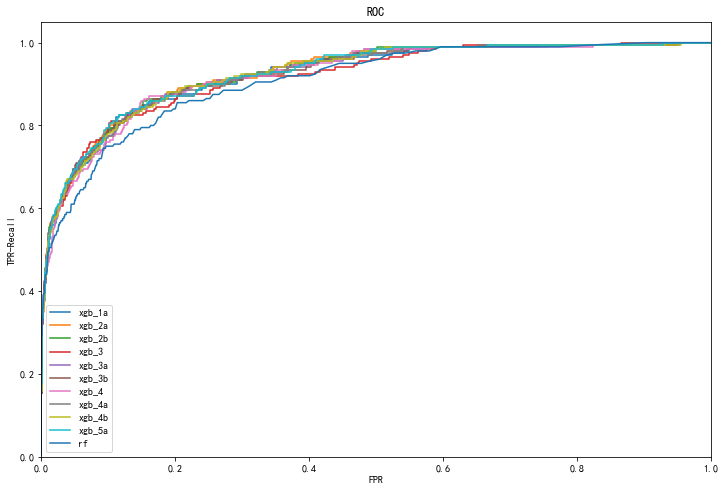

In [50]:
from sklearn.metrics import roc_curve, auc
rcParams['figure.figsize'] = 12,8

df_test_predprob = [df_test_predprob_1a,
                    df_test_predprob_2a,df_test_predprob_2b,
                    df_test_predprob_3,df_test_predprob_3a,df_test_predprob_3b,
                    df_test_predprob_4,df_test_predprob_4a,df_test_predprob_4b,
                    df_test_predprob_5a,
                    df_test_predprob_rf]
model_names = ["{}_{}".format('xgb',col) for col in ["1a","2a","2b","3","3a","3b","4","4a","4b","5a"]]+["rf"]

# Plot Precision-Recall curves
for name,predprob in zip(model_names,df_test_predprob)[:]:
    fpr, tpr, thresholds = roc_curve(df_test[target].values,predprob)
    plt.plot(fpr, tpr, label=name)
plt.xlabel('FPR')
plt.ylabel('TPR-Recall')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('ROC')
plt.legend()

# Precision-Recall curve

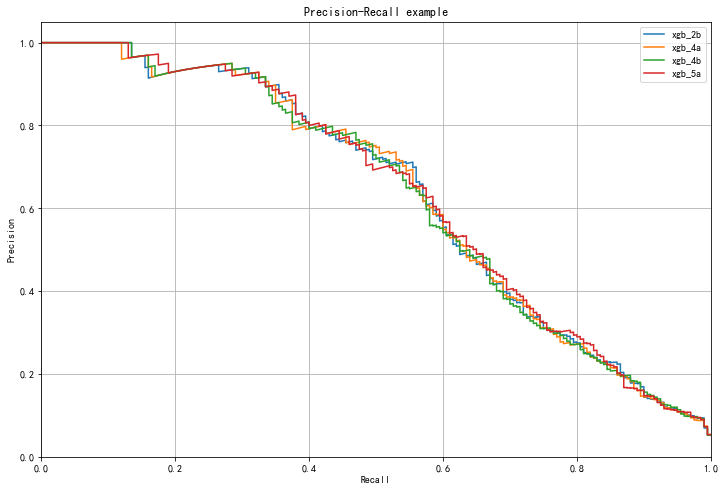

In [52]:
from sklearn.metrics import precision_recall_curve
rcParams['figure.figsize'] = 12,8

# Plot Precision-Recall curve
for name,predprob in zip(model_names,df_test_predprob)[2:3]:
    precision, recall, thresholds = precision_recall_curve(df_test[target].values,predprob)
    plt.plot(recall, precision, label=name)
for name,predprob in zip(model_names,df_test_predprob)[7:10]:
    precision, recall, thresholds = precision_recall_curve(df_test[target].values,predprob)
    plt.plot(recall, precision, label=name)
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example')
plt.legend()

**结论：**  
    (1) 特征清洗后，未在原特征上构造共线性特征时要好一些，如2a，2b在pr曲线上的表现！  
    (2) 加上稀疏特征（医院特征，交易特征）后，模型性能似乎又有些提升。是否去掉构建的fee_xx特征会更好？

# Feature Importance

In [25]:
feat_imp = pd.concat([feat_imp_1a, feat_imp_2a, feat_imp_2b, feat_imp_3, feat_imp_3a, feat_imp_3b],axis=1)

In [26]:
feat_imp['total'] = feat_imp.sum(axis=1)

In [27]:
feat_imp = feat_imp.sort_values(by='total',ascending=False)

In [37]:
feat_imp.columns = ["{}_{}".format("model",str(col)) for col in feat_imp.columns]

In [43]:
feat_imp.to_csv("feat_imp.csv",encoding='utf-8')

In [50]:
feat_imp['mean'] = feat_imp[feat_imp.columns.difference(['model_total'])].mean(axis=1)
feat_imp['std'] = feat_imp[feat_imp.columns.difference(['model_total'])].std(axis=1)

In [51]:
feat_imp[-40:]

,model_0,model_1,model_2,model_3,model_4,model_5,model_total,mean,std
其它发生金额_q3,11.0,10.0,18.0,NaN,2.0,14.0,55.0,10.048584,5.305739
every_period_20,18.0,7.0,19.0,NaN,5.0,4.0,53.0,9.921655,6.535801
医疗救助医院申请_sum,11.0,11.0,14.0,1.0,6.0,9.0,52.0,8.027134,4.196902
every_period_28,12.0,9.0,21.0,NaN,3.0,7.0,52.0,9.675516,6.060320
民政救助补助金额_max,8.0,11.0,19.0,NaN,6.0,7.0,51.0,9.284573,4.722252
医疗救助个人按比例负担金额_q3,13.0,5.0,15.0,1.0,4.0,10.0,48.0,7.576175,5.035771
贵重药品发生金额_q2,11.0,9.0,14.0,NaN,5.0,7.0,46.0,8.187350,3.151335
公务员医疗补助基金支付金额_q2,10.0,7.0,15.0,NaN,3.0,10.0,45.0,8.158281,3.964604
治疗费申报金额_q1,5.0,10.0,16.0,NaN,3.0,9.0,43.0,7.916481,4.507534
民政救助补助金额_q3,4.0,12.0,14.0,NaN,5.0,4.0,39.0,7.218022,4.314678


In [44]:
feat_clean = feat_imp[feat_imp.isnull().sum(axis=1).sort_values(ascending=False) >= 2].index

D:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [35]:
feat_clean = feat_imp[feat_imp.isnull().sum(axis=1).sort_values(ascending=False) >= 2].index

D:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [45]:
feat_clean

Index([u'fee_zifei_mean', u'fee_fasheng_shenbao', u'fee_fasheng_mean',
       u'fee_shenbao_mean', u'fee_zhifu_mean', u'fee_buzhu_mean',
       u'fee_zifei_sum', u'fee_fasheng_sum', u'fee_shenbao_sum',
       u'fee_zhifu_sum', u'检查费申报金额_q2', u'every_period_26', u'一次性医用材料申报金额_q1',
       u'检查费自费金额_q3', u'医疗救助医院申请_mean', u'床位费申报金额_max', u'fee_buzhu_sum',
       u'公务员医疗补助基金支付金额_sum', u'every_period_23', u'贵重检查费金额_q3',
       u'医疗救助个人按比例负担金额_q2', u'中草药费发生金额_q1', u'高价材料发生金额_sum', u'其它申报金额_mean',
       u'医疗救助医院申请_q2', u'高价材料发生金额_mean'],
      dtype='object')

# Model persistence

In [ ]:
# save model to file
pickle.dump(xgb_2a, open("xgb_2a.pickle.dat", "wb"))

In [ ]:
# load model from file
loaded_model = pickle.load(open("xgb_2a.pickle.dat", "rb"))